In [2]:
import pandas as pd

In [87]:
default_df = pd.read_csv('nvidia_smi_log.default_h100_training_llama2.2.csv')
agent_df = pd.read_csv('nvidia_smi_log.agent_h100_training_llama2.7.csv')

In [88]:
#find the first value where utilization is over 50
default_df = default_df[default_df['utilization.gpu(%)'] > 50]
agent_df = agent_df[agent_df['utilization.gpu(%)'] > 50]

In [89]:
#calculate number of seconds between each row
default_df['timestamp'] = pd.to_datetime(default_df['timestamp'])
default_df['time_diff'] = default_df['timestamp'].diff().dt.total_seconds()
agent_df['timestamp'] = pd.to_datetime(agent_df['timestamp'])
agent_df['time_diff'] = agent_df['timestamp'].diff().dt.total_seconds()


In [90]:
#calculate the total watt-seconds
default_df['watt_seconds'] = default_df['power.draw(W)'] * default_df['time_diff']
agent_df['watt_seconds'] = agent_df['power.draw(W)'] * agent_df['time_diff']

In [91]:
#calculate the total seconds
default_total_seconds = default_df['time_diff'].sum()
agent_total_seconds = agent_df['time_diff'].sum()
print('default total seconds:', default_total_seconds)
print('agent total seconds:', agent_total_seconds)

default total seconds: 536.439
agent total seconds: 552.312


In [92]:
print('Default watt-seconds: ', default_df['watt_seconds'].sum())
print('Agent watt-seconds: ', agent_df['watt_seconds'].sum())

Default watt-seconds:  364013.49225999997
Agent watt-seconds:  344923.15811


<Axes: >

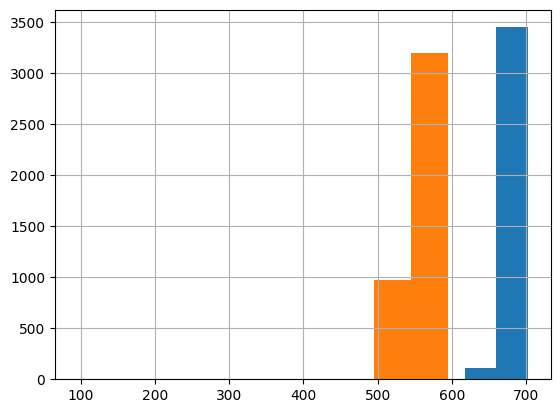

In [86]:
#generate a historgram of the power draw
default_df['power.draw(W)'].hist()
agent_df['power.draw(W)'].hist()


In [62]:
#read in the freq search
nvidia_freq_df = pd.read_csv('nvidia_smi_log.freq_h100_training_llama2.partial.csv', parse_dates=['timestamp'])
training_freq_df = pd.read_csv('training_load.freq_h100_training_llama2.partial.csv', parse_dates=['StartTime', 'EndTime'])

In [66]:
#in nvidia_freq calculate the watt-seconds for each row
nvidia_freq_df['time_diff'] = nvidia_freq_df['timestamp'].diff().dt.total_seconds()
nvidia_freq_df['watt_seconds'] = nvidia_freq_df['power.draw(W)'] * nvidia_freq_df['time_diff']


In [67]:
#for each row in training_freq, find the corresponding rows in nvidia_freq and sum the watt-seconds
training_freq_df['watt_seconds'] = 0
for index, row in training_freq_df.iterrows():
    start_time = row['StartTime']
    end_time = row['EndTime']
    mask = (nvidia_freq_df['timestamp'] >= start_time) & (nvidia_freq_df['timestamp'] <= end_time)
    training_freq_df.loc[index, 'watt_seconds'] = nvidia_freq_df[mask]['watt_seconds'].sum()
    training_freq_df.loc[index, 'load'] = nvidia_freq_df[mask]['utilization.gpu(%)'].mean()
    training_freq_df.loc[index, 'frequency'] = nvidia_freq_df[mask]['gpu.frequency(Ghz)'].mean()

C:\Users\scott\AppData\Local\Temp\ipykernel_26332\3957400747.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '373772.95131' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  training_freq_df.loc[index, 'watt_seconds'] = nvidia_freq_df[mask]['watt_seconds'].sum()


In [68]:
training_freq_df['frequencyOfMax'] = training_freq_df['frequency'] / training_freq_df['frequency'].max()

In [69]:
training_freq_df = training_freq_df[training_freq_df['BatchSize'] > 8]

In [70]:
training_freq_df.head(50)

,StartTime,EndTime,TotalDuration(seconds),BatchSize,MaxSeqLen,Model,watt_seconds,load,frequency,frequencyOfMax
1,2024-12-20 19:06:18,2024-12-20 19:26:03,1184.8586,16,4096,llama2,741522.51338,90.226384,1853.118266,0.998310
2,2024-12-20 19:06:18,2024-12-20 19:26:28,1210.1129,32,4096,llama2,747179.58723,88.737862,1853.467386,0.998499
3,2024-12-20 19:06:18,2024-12-20 19:26:53,1234.8419,64,4096,llama2,752940.87156,87.301008,1854.280485,0.998937
4,2024-12-20 19:06:18,2024-12-20 19:27:12,1253.5092,128,4096,llama2,755462.68636,86.059532,1856.254429,1.000000
7,2024-12-20 19:29:00,2024-12-20 20:33:39,3878.8750,16,4096,llama2,685847.78379,97.371735,345.000000,0.185858
8,2024-12-20 19:29:00,2024-12-20 20:34:17,3916.3984,32,4096,llama2,690479.48919,96.899664,345.000000,0.185858
9,2024-12-20 19:29:00,2024-12-20 20:34:53,3952.8406,64,4096,llama2,694833.80984,96.474618,345.000000,0.185858
10,2024-12-20 19:29:00,2024-12-20 20:35:13,3972.9560,128,4096,llama2,696401.94306,96.080910,345.000000,0.185858
11,2024-12-20 19:29:00,2024-12-20 20:35:33,3992.4268,256,4096,llama2,697930.77527,95.696895,345.000000,0.185858
12,2024-12-20 19:29:00,2024-12-20 20:35:51,4010.8132,512,4096,llama2,699243.63748,95.352331,345.000000,0.185858


<Axes: xlabel='frequencyOfMax', ylabel='watt_seconds'>

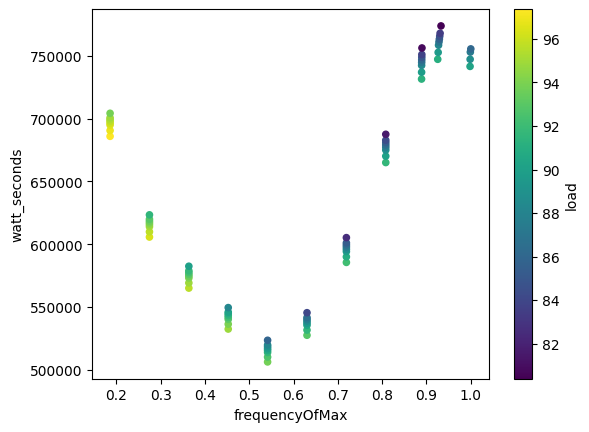

In [71]:
#plot freqency versus watt-seconds
training_freq_df.plot.scatter(x='frequencyOfMax', y='watt_seconds', c='load', colormap='viridis')

In [76]:
training_freq_df = training_freq_df[training_freq_df['BatchSize']==16]

In [77]:
training_freq_df.sort_values('watt_seconds', ascending=True).head(10)

,StartTime,EndTime,TotalDuration(seconds),BatchSize,MaxSeqLen,Model,watt_seconds,load,frequency,frequencyOfMax
43,2024-12-20 22:46:54,2024-12-20 23:14:29,1654.7156,16,4096,llama2,506217.50024,93.724042,1004.925245,0.541373
52,2024-12-20 23:17:26,2024-12-20 23:41:20,1434.5697,16,4096,llama2,527447.79271,92.862615,1169.983146,0.630292
34,2024-12-20 22:10:48,2024-12-20 22:43:56,1988.1664,16,4096,llama2,532397.12343,94.817142,839.974836,0.452511
25,2024-12-20 21:27:49,2024-12-20 22:07:43,2394.6821,16,4096,llama2,564997.02624,95.631219,674.978706,0.363624
61,2024-12-20 23:44:15,2024-12-21 00:06:02,1307.5138,16,4096,llama2,585458.26608,92.183872,1335.000000,0.719190
16,2024-12-20 20:37:00,2024-12-20 21:24:39,2858.3557,16,4096,llama2,605660.26351,96.322972,509.947124,0.274718
70,2024-12-21 00:08:52,2024-12-21 00:29:19,1227.5110,16,4096,llama2,664966.67423,91.616824,1500.000000,0.808079
7,2024-12-20 19:29:00,2024-12-20 20:33:39,3878.8750,16,4096,llama2,685847.78379,97.371735,345.000000,0.185858
79,2024-12-21 00:32:07,2024-12-21 00:51:47,1179.8787,16,4096,llama2,731454.27741,91.259865,1649.966284,0.888869
1,2024-12-20 19:06:18,2024-12-20 19:26:03,1184.8586,16,4096,llama2,741522.51338,90.226384,1853.118266,0.998310


In [78]:
training_freq_df.sort_values('TotalDuration(seconds)', ascending=True).head(10)

,StartTime,EndTime,TotalDuration(seconds),BatchSize,MaxSeqLen,Model,watt_seconds,load,frequency,frequencyOfMax
88,2024-12-21 00:54:36,2024-12-21 01:14:13,1176.9594,16,4096,llama2,747183.13552,91.019122,1717.683985,0.925349
79,2024-12-21 00:32:07,2024-12-21 00:51:47,1179.8787,16,4096,llama2,731454.27741,91.259865,1649.966284,0.888869
1,2024-12-20 19:06:18,2024-12-20 19:26:03,1184.8586,16,4096,llama2,741522.51338,90.226384,1853.118266,0.998310
70,2024-12-21 00:08:52,2024-12-21 00:29:19,1227.5110,16,4096,llama2,664966.67423,91.616824,1500.000000,0.808079
61,2024-12-20 23:44:15,2024-12-21 00:06:02,1307.5138,16,4096,llama2,585458.26608,92.183872,1335.000000,0.719190
52,2024-12-20 23:17:26,2024-12-20 23:41:20,1434.5697,16,4096,llama2,527447.79271,92.862615,1169.983146,0.630292
43,2024-12-20 22:46:54,2024-12-20 23:14:29,1654.7156,16,4096,llama2,506217.50024,93.724042,1004.925245,0.541373
34,2024-12-20 22:10:48,2024-12-20 22:43:56,1988.1664,16,4096,llama2,532397.12343,94.817142,839.974836,0.452511
25,2024-12-20 21:27:49,2024-12-20 22:07:43,2394.6821,16,4096,llama2,564997.02624,95.631219,674.978706,0.363624
16,2024-12-20 20:37:00,2024-12-20 21:24:39,2858.3557,16,4096,llama2,605660.26351,96.322972,509.947124,0.274718


In [74]:
#find the row with the highest watt-seconds and lowest duration
training_freq_df.loc[training_freq_df['watt_seconds'].idxmax()]


StartTime                 2024-12-21 00:54:36
EndTime                   2024-12-21 01:17:03
TotalDuration(seconds)              1347.0631
BatchSize                                2048
MaxSeqLen                                4096
Model                                  llama2
watt_seconds                     773756.66054
load                                80.384111
frequency                         1731.435362
frequencyOfMax                       0.932758
Name: 95, dtype: object

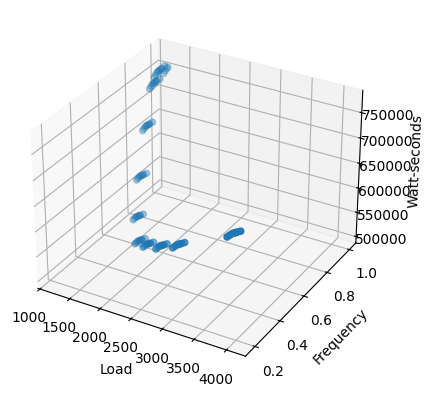

In [163]:
#plot 3d graph of load, frequency, and watt-seconds
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(training_freq_df['TotalDuration(seconds)'], training_freq_df['frequencyOfMax'], training_freq_df['watt_seconds'])
ax.set_xlabel('Load')
ax.set_ylabel('Frequency')
ax.set_zlabel('Watt-seconds')

plt.show() 
